# Students Exam Scores: Extended Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./Expanded_data_with_more_features.csv')
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


## Проаналізуйте розподіл за статтю серед учнів

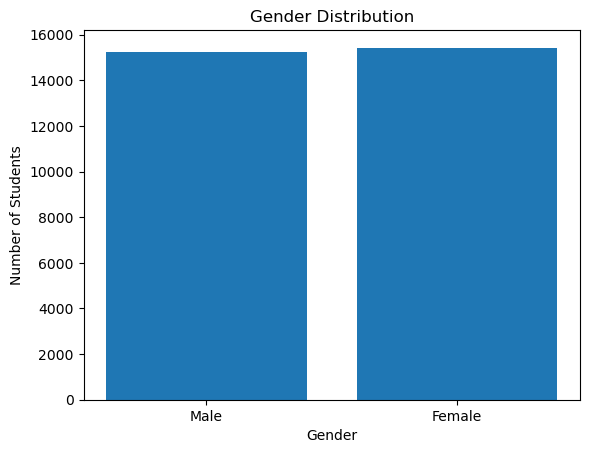

In [3]:
males = df[df["Gender"] == "male"]
females = df[df["Gender"] == "female"]

plt.bar(["Male", "Female"], [len(males), len(females)])
plt.xlabel("Gender")
plt.ylabel("Number of Students")
plt.title("Gender Distribution")
plt.show()

### 1. Скільки студентів і студенток у наборі даних?

In [4]:
print("Male students:", len(males))
print("Female students:", len(females))

Male students: 15217
Female students: 15424


### 2. Який відсоток студентів чоловічої статі в наборі даних?

In [5]:
print("Male student percentage:", len(males) / len(df) * 100)

Male student percentage: 49.6622172905584


### 3. Який відсоток студенток у наборі даних?

In [6]:
print("Female student percentage:", len(females) / len(df) * 100)

Female student percentage: 50.337782709441605


## Дослідіть зв’язок між етнічною групою та результатами тестів

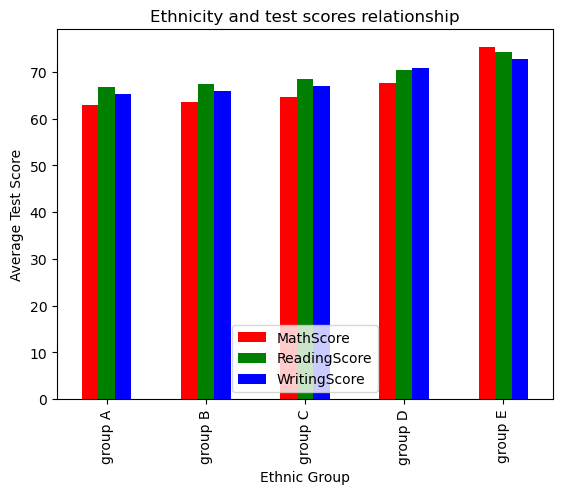

In [7]:
ethnic_group_means = df[["EthnicGroup", "MathScore","ReadingScore","WritingScore"]].groupby("EthnicGroup").mean()

ethnic_group_means.plot(kind="bar", y=["MathScore", "ReadingScore", "WritingScore"], color=['r', 'g', 'b'])
plt.xlabel("Ethnic Group")
plt.ylabel("Average Test Score")
plt.title("Ethnicity and test scores relationship")
plt.show()

### 4. Яка етнічна група має найвищий середній бал з математики?

In [8]:
print(df.groupby('EthnicGroup')['MathScore'].mean().idxmax())

group E


### 5. Яка етнічна група має найвищий середній бал читання?

In [9]:
print(df.groupby('EthnicGroup')['ReadingScore'].mean().idxmax())

group E


### 6. Яка етнічна група має найвищий середній бал з письма?

In [10]:
print(df.groupby('EthnicGroup')['WritingScore'].mean().idxmax())

group E


## Дослідіть вплив курсу підготовки до тесту на результати тесту.

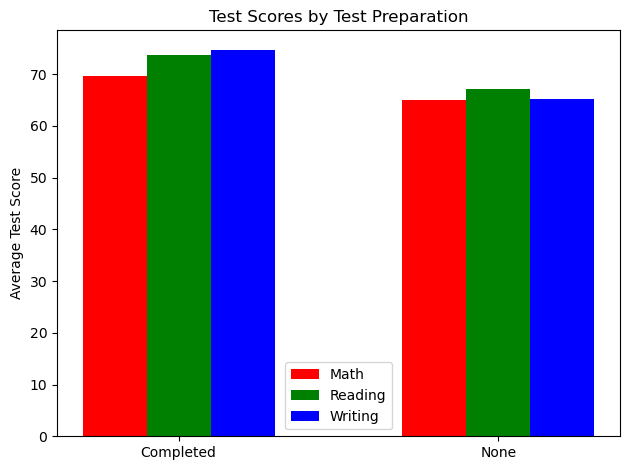

In [24]:
test_prep_students = df[df["TestPrep"] == "completed"]
no_test_prep_students = df[df["TestPrep"] == "none"]

test_prep_labels = ["Completed", "None"]
math_scores = [test_prep_students["MathScore"].mean(), no_test_prep_students["MathScore"].mean()]
reading_scores = [test_prep_students["ReadingScore"].mean(), no_test_prep_students["ReadingScore"].mean()]
writing_scores = [test_prep_students["WritingScore"].mean(), no_test_prep_students["WritingScore"].mean()]

x = np.arange(len(test_prep_labels))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, math_scores, width, label="Math", color='r')
rects2 = ax.bar(x, reading_scores, width, label="Reading", color='g')
rects3 = ax.bar(x + width, writing_scores, width, label="Writing", color='b')

ax.set_ylabel("Average Test Score")
ax.set_title("Test Scores by Test Preparation")
ax.set_xticks(x)
ax.set_xticklabels(test_prep_labels)
ax.legend()

fig.tight_layout()
plt.show()

### 7. Який середній бал з математики для студентів, які закінчили курс підготовки до тесту?

In [12]:
print(df[df['TestPrep'] == 'completed']['MathScore'].mean())

69.5466599698644


### 8. Який середній бал з читання для студентів, які пройшли курс підготовки до тесту?

In [13]:
print(df[df['TestPrep'] == 'completed']['ReadingScore'].mean())

73.73299849321948


### 9. Який середній бал для студентів, які закінчили курс підготовки до тесту?

In [14]:
print(df[df['TestPrep'] == 'completed']['WritingScore'].mean())

74.70326469111


## Проаналізуйте розподіл батьків(ів) за сімейним станом серед учнів.

Text(0.5, 1.0, 'Distribution of Parents by Marital Status')

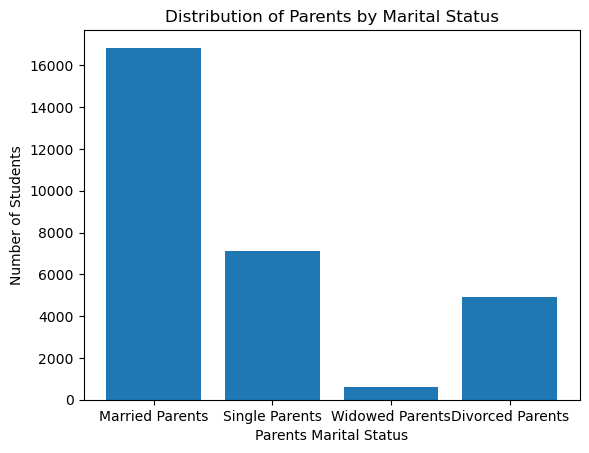

In [15]:
married_parents_students = df[df["ParentMaritalStatus"] == "married"]
single_parents_students = df[df["ParentMaritalStatus"] == "single"]
widowed_parents_students = df[df["ParentMaritalStatus"] == "widowed"]
divorced_parents_students = df[df["ParentMaritalStatus"] == "divorced"]

plt.bar(["Married Parents", "Single Parents", "Widowed Parents", "Divorced Parents"], [len(married_parents_students),  len(single_parents_students),   len(widowed_parents_students), 
                                                                                       len(divorced_parents_students)])
plt.xlabel("Parents Marital Status")
plt.ylabel("Number of Students")
plt.title("Distribution of Parents by Marital Status")

### 10. Скільки студентів мають одружених батьків?

In [16]:
print(len(df[df['ParentMaritalStatus'] == 'married']))

16844


### 11. Скільки студентів мають батьків-одинаків?

In [17]:
print(len(df[df['ParentMaritalStatus'] == 'single']))

7097


## Дослідіть зв’язок між заняттями спортом і результатами тестів.

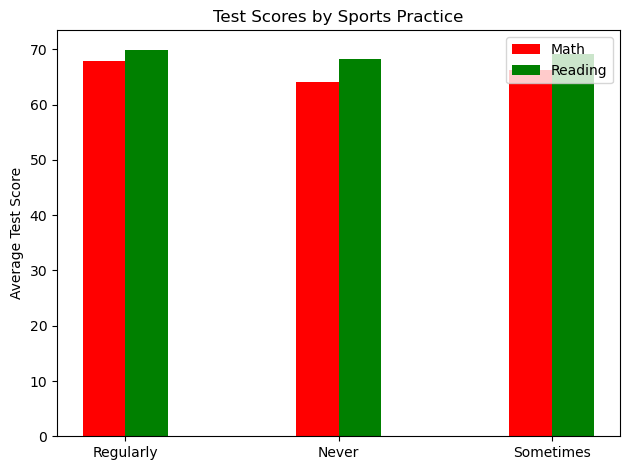

In [18]:
sports_regularly_students = df[df["PracticeSport"] == "regularly"]
sports_never_students = df[df["PracticeSport"] == "never"]
sports_sometimes_students = df[df["PracticeSport"] == "sometimes"]

sports_labels = ["Regularly", "Never", "Sometimes"]
math_scores = [sports_regularly_students["MathScore"].mean(), 
               sports_never_students["MathScore"].mean(), 
               sports_sometimes_students["MathScore"].mean()]
reading_scores = [sports_regularly_students["ReadingScore"].mean(), 
                  sports_never_students["ReadingScore"].mean(), 
                  sports_sometimes_students["ReadingScore"].mean()]

x = np.arange(len(sports_labels))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, math_scores, width, label="Math", color='r')
rects2 = ax.bar(x + width/2, reading_scores, width, label="Reading", color='g')

ax.set_ylabel("Average Test Score")
ax.set_title("Test Scores by Sports Practice")
ax.set_xticks(x)
ax.set_xticklabels(sports_labels)
ax.legend()

fig.tight_layout()
plt.show()

### 12. Чи студенти, які регулярно займаються спортом, мають вищі середні результати з математики, ніж ті, хто ніколи не займається спортом?

In [19]:
avg_math_sports = df.groupby('PracticeSport')['MathScore'].mean()
print(avg_math_sports['regularly'] > avg_math_sports['never'])

True


### 13. Чи студенти, які регулярно займаються спортом, мають вищі середні результати читання, ніж ті, хто ніколи не займається спортом?

In [20]:
avg_math_sports = df.groupby('PracticeSport')['ReadingScore'].mean()
print(avg_math_sports['regularly'] > avg_math_sports['never'])

True


## Проаналізуйте розподіл транспортних засобів до школи серед учнів.

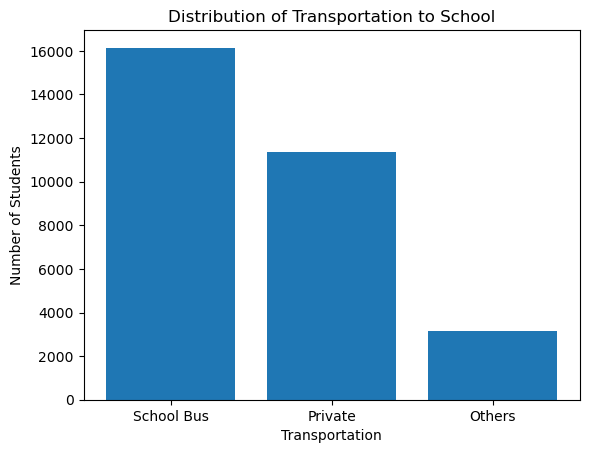

In [21]:
school_bus_students = df[df["TransportMeans"] == "school_bus"]
private_transport_students = df[df["TransportMeans"] == "private"]
other_transport = df[df["TransportMeans"].isna()]

plt.bar(["School Bus", "Private", "Others"], [len(school_bus_students), len(private_transport_students), len(other_transport)])
plt.xlabel("Transportation")
plt.ylabel("Number of Students")
plt.title("Distribution of Transportation to School")
plt.show()

### 14. Скільки учнів користується шкільним автобусом, щоб дістатися до школи?

In [22]:
print(len(df[df['TransportMeans'] == 'school_bus']))

16145


### 15. Скільки учнів користується приватним транспортом, щоб дістатися до школи?

In [23]:
print(len(df[df['TransportMeans'] == 'private']))

11362
